# 1.0 Dependencies

In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt


# 2.0 Gathering data

Manual CSV downloads were taken from https://finance.yahoo.com/

## 2.1 Asking the user to select the folder where data is

In [3]:
#Create GUI
Mastergui = tk.Tk()
folder_selected = filedialog.askdirectory(title="Select location of data")
Mastergui.destroy()

## Read .csv data to dataframes

In [4]:
stock_tickers=['AAPL','IBM','MSFT']
aapl=pd.read_csv(folder_selected+'/'+stock_tickers[0]+'.csv',parse_dates=True,index_col='Date')
ibm=pd.read_csv(folder_selected+'/'+stock_tickers[1]+'.csv',parse_dates=True,index_col='Date')
msft=pd.read_csv(folder_selected+'/'+stock_tickers[2]+'.csv',parse_dates=True,index_col='Date')

In [5]:
#inspecting the data
ibm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,0.662902,387200
1962-01-03,7.626667,7.693333,7.626667,7.693333,0.668697,288000
1962-01-04,7.693333,7.693333,7.613333,7.616667,0.662033,256000
1962-01-05,7.606667,7.606667,7.453333,7.466667,0.648996,363200
1962-01-08,7.460000,7.460000,7.266667,7.326667,0.636827,544000


# 3.0 Plotting the data

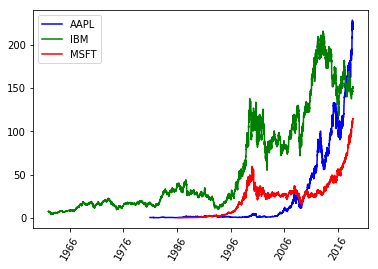

In [20]:
plt.plot(aapl['Close'],label='AAPL',color='blue')
plt.plot(ibm['Close'],label='IBM',color='green')
plt.plot(msft['Close'],label='MSFT',color='red')

#add a legend for clarity
plt.legend(loc='upper left')

#rotate labels of x-axis
plt.xticks(rotation=60)
plt.show()

## 3.1 Plotting with time slicing

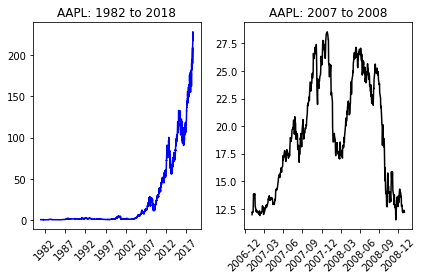

In [27]:
# Plot the series in the top subplot in blue
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title('AAPL: 1982 to 2018')
plt.plot(aapl['Close'], color='blue')

# Slice aapl from '2007' to '2008' inclusive: view
view = aapl['Close']['2007':'2008']

# Plot the sliced data in the bottom subplot in black
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()

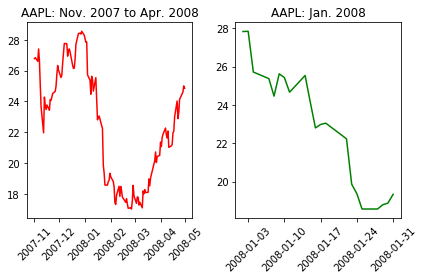

In [29]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['Close']['2007-11':'2008-04']

# Plot the sliced series in the top subplot in red
plt.subplot(1,2,1)
plt.plot(view,color='red')
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.xticks(rotation=45)

# Reassign the series by slicing the month January 2008
view = aapl['Close']['2008-01']

# Plot the sliced series in the bottom subplot in green
plt.subplot(1,2,2)
plt.plot(view,color='green')
plt.title('AAPL: Jan. 2008')
plt.xticks(rotation=45)

# Improve spacing and display the plot
plt.tight_layout()
plt.show()


## 3.2 Plotting with inset plots for focus

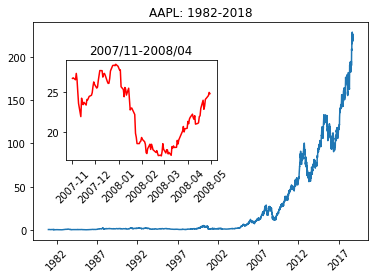

In [34]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['Close']['2007-11':'2008-04']

# Plot the entire series 
plt.plot(aapl['Close'])
plt.xticks(rotation=45)
plt.title('AAPL: 1982-2018')

# Specify the axes
plt.axes([0.20,0.4,0.35,0.35])

# Plot the sliced series in red using the current axes
plt.plot(view,color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show()
